In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

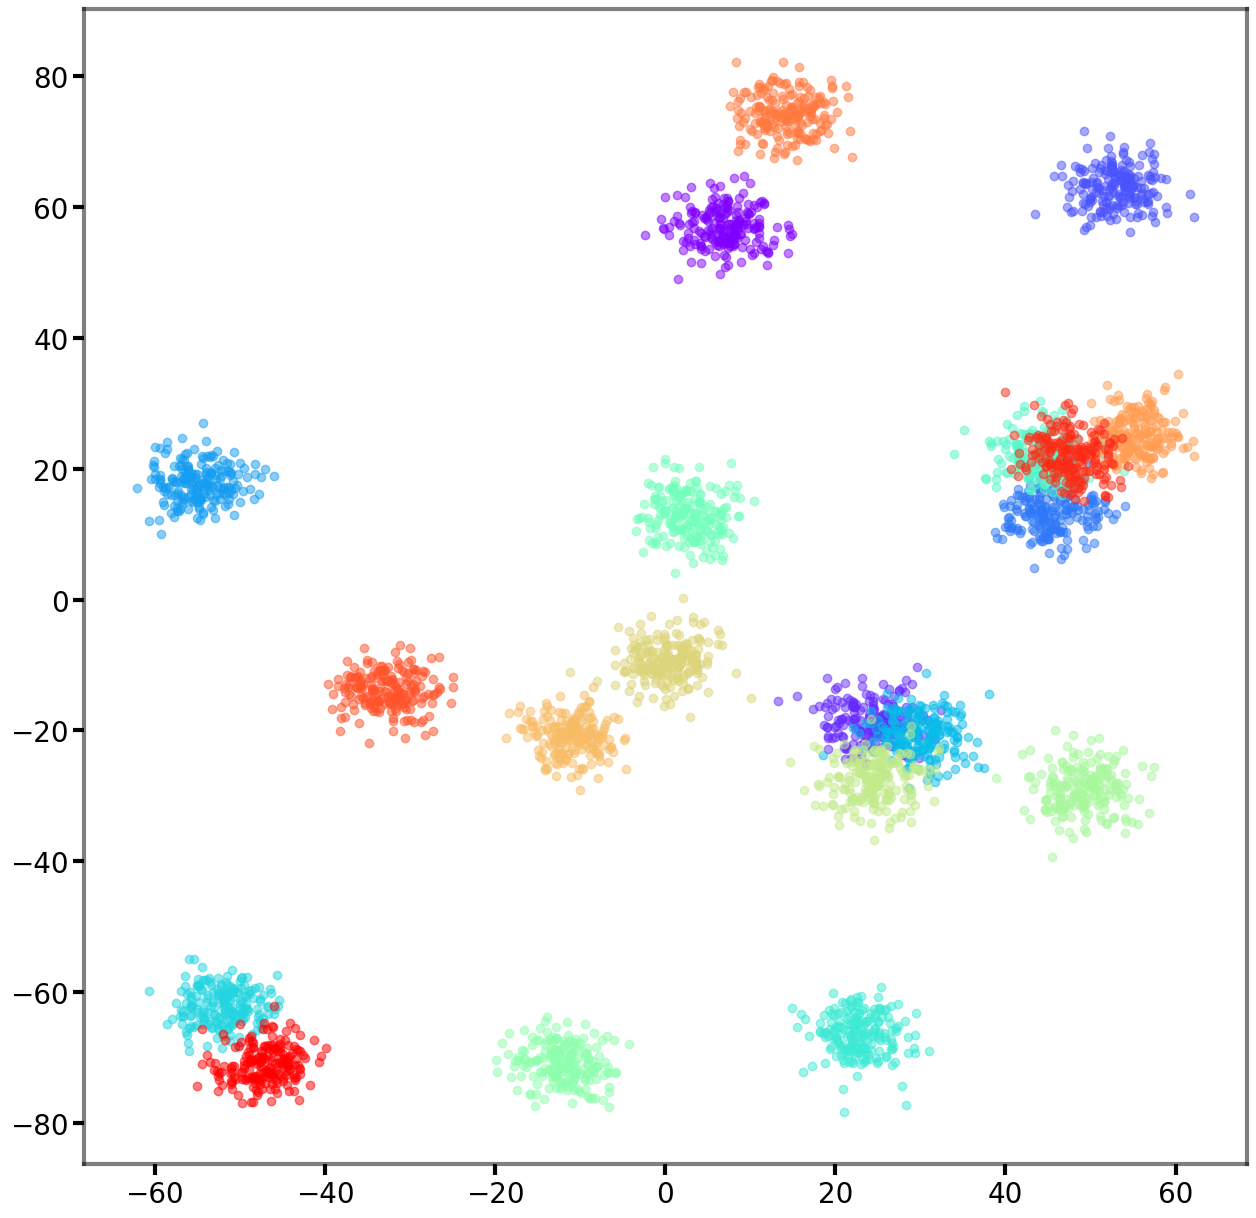

In [2]:
np.random.seed(8)
n_data = 20
n_point = 200
scale = 3
x_mean_list = np.random.randint(-60, 60, 20)
y_mean_list = np.random.randint(-80, 80, 20)

cmap = cm.get_cmap('rainbow', lut=n_data)

fig, ax = plt.subplots(figsize=(15,15))

for data_idx in range(n_data):
    x_data = np.random.normal(loc=x_mean_list[data_idx],
                            scale=scale,
                            size=(1,n_point))
    y_data = np.random.normal(loc=y_mean_list[data_idx],
                            scale=scale,
                            size=(1,n_point))
    ax.scatter(x_data, y_data,
                color=cmap(data_idx),
                alpha=0.5)
ax.tick_params(axis='both',
            labelsize=20,
            length=8,
            width=3)
for spine_loc, spine in ax.spines.items():
    spine.set_linewidth(3)
    spine.set_alpha(0.5)

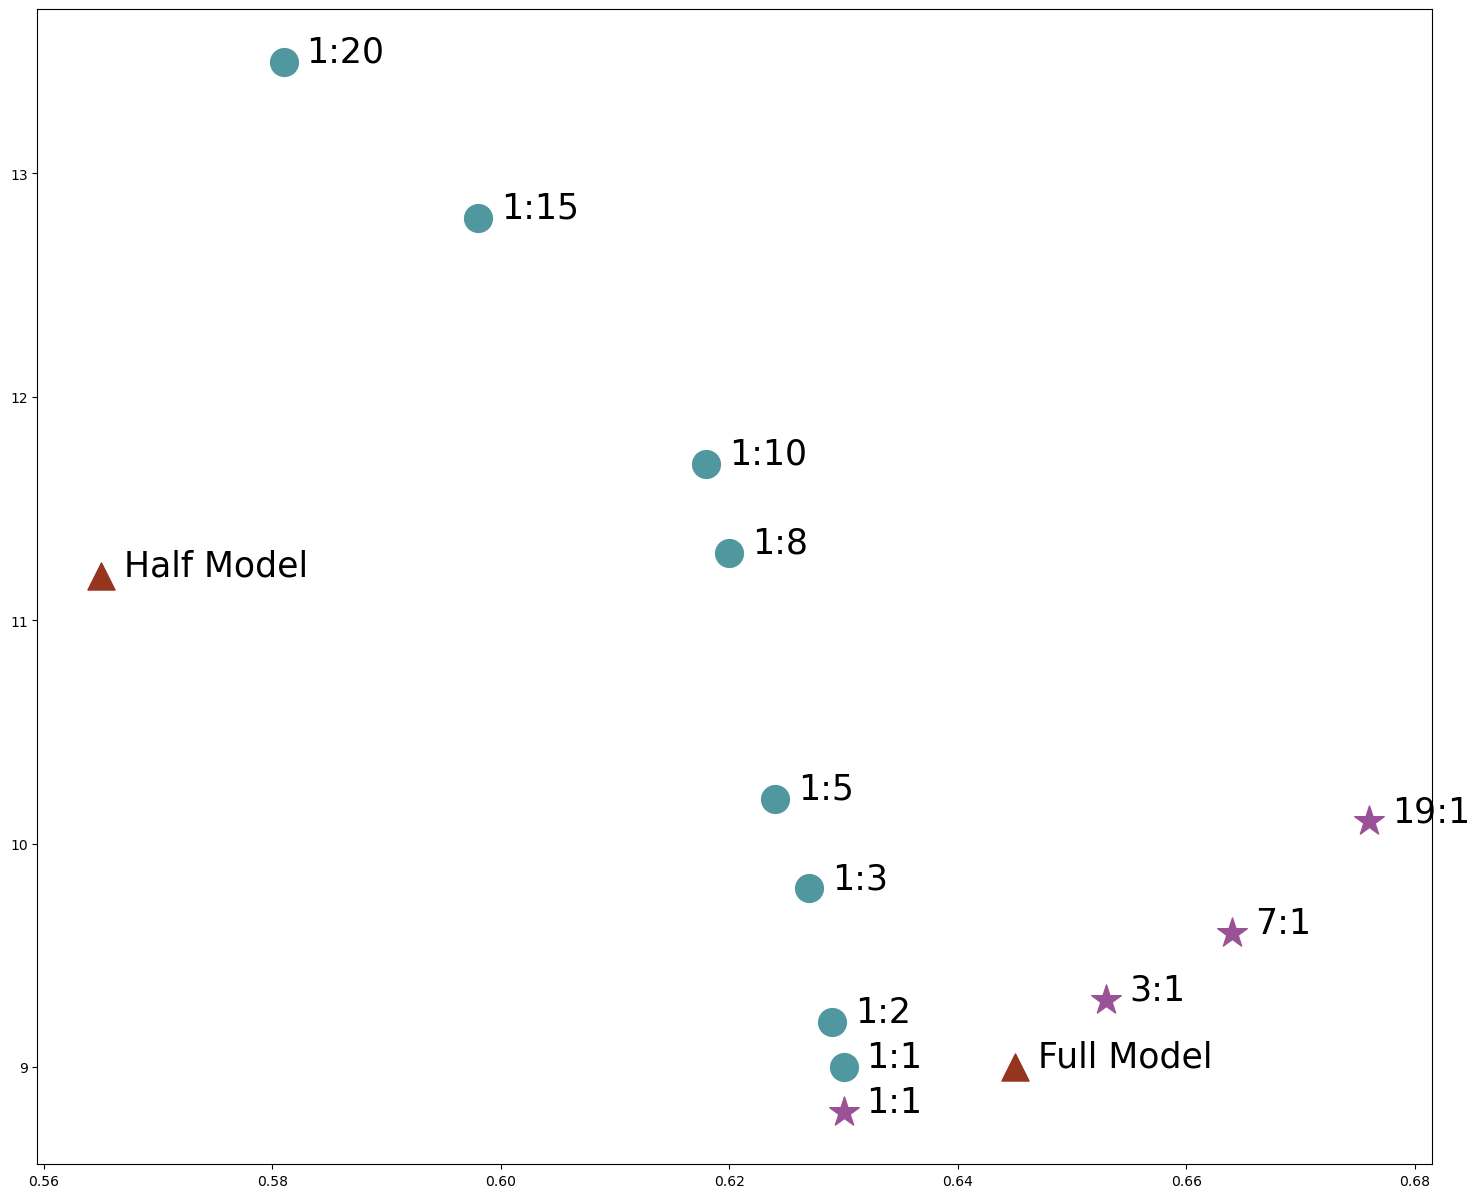

In [3]:
names = ['DFF R-FCN', 'R-FCN', 'FGFA R-FCN']
dff_data = np.array([(0.581, 13.5),(0.598, 12.8),(0.618, 11.7),
                    (0.62, 11.3), (0.624, 10.2), (0.627, 9.8),
                    (0.629, 9.2), (0.63, 9)])
r_data = np.array([(0.565, 11.2), (0.645, 9)])
fgfa_data = np.array([(0.63, 8.8), (0.653, 9.3), (0.664, 9.6),
                    (0.676, 10.1)])
dff_text = ['1:20', '1:15', '1:10', '1:8',
            '1:5', '1:3', '1:2', '1:1']
r_text = ['Half Model', 'Full Model']
fgfa_text = ['1:1', '3:1', '7:1', '19:1']

colors = ['#5097A0', '#95341F', '#9A5296']
markers = ['o', '^', '*']
markersizes = [400, 380, 500]
data_vars = ['dff', 'r', 'fgfa']

fig, ax = plt.subplots(figsize = (18,15))
for data_idx in range(3):
    data_template = 'data = ' + data_vars[data_idx] + '_data'
    text_template = 'text_arr = ' + data_vars[data_idx] + '_text'
    exec(data_template)
    exec(text_template)
    
    ax.scatter(data[:,0], data[:,1],
                s=markersizes[data_idx],
                c=colors[data_idx],
                label=names[data_idx],
                marker=markers[data_idx])

    for text_idx, text in enumerate(text_arr):
        ax.text(data[text_idx,0]+0.002, data[text_idx,1],
        text,fontsize=25)

In [4]:
ax.legend(loc='upper right',
            fontsize=30)

for spine_loc, spine in ax.spines.items():
    if spine_loc in ['right', 'top']:
        spine.set_visible(False)
    if spine_loc in ['left', 'bottom']:
        spine.set_linewidth(3)

ax.set_xlim([0.56, 0.685])
ax.set_ylim([8.5, 14])

ax.set_xlabel('mAP', fontsize=50)
ax.set_ylabel('AD', fontsize=50)

x_ticks = np.arange(0.58, 0.69, 0.02)
y_ticks = np.arange(9, 15, 1)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.tick_params(labelsize=30,
                length=0)
ax.grid()

In [5]:
def data2size(data, min_size, max_size):
    data_copy = data.copy()
    
    min_val = np.min(data_copy)
    data_copy -= min_val
    
    max_val = np.max(data_copy)
    data_copy = data_copy / max_val
    
    interval = max_size - min_size
    data_copy *= interval
    data_copy += min_size
    return data_copy

countries = ['Australia', 'Austria', 'Belgium', 'Canada', 'Chile',
            'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
            'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
            'Israel', 'Italy', 'Japan', 'Korea', 'Luxembourg',
            'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
            'Portuagl', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
            'Switzerland', 'Turkey', 'United Kingdom', 'United States']
population_denstiy = [3, 101, 367, 4, 23,
                    133, 130, 29, 16, 117,
                    227, 86, 106, 3, 65,
                    365, 203, 337, 501, 207,
                    60, 406, 17, 13, 122,
                    116, 110, 103, 91, 21,
                    194, 97, 257, 32]
private_expenditure = [1.3, 8.9, 10.0, 10.9, 12.8,
                    13.0, 13.2, 13.4, 13.5, 14.8,
                    15.0, 15.8, 16.7, 17.1, 17.2,
                    17.4, 18.1, 18.1, 18.7, 18.9,
                    19.0, 19.0, 19.5, 19.9, 20.0,
                    21.5, 21.6, 23.0, 24.0, 25.0,
                    25.9, 26.7, 28.0, 34.3]
gdp = [38.7, 37.4, 33.6, 37.5, 16.4,
                    24.5, 33.2, 19.3, 32.1, 32.0,
                    36.2, 19.8, 17.8, 37.7, 37.7,
                    29.4, 26.6, 32.0, 31.0, 67.9,
                    13.4, 38.4, 27.0, 48.2, 18.9,
                    20.9, 21.8, 24.2, 26.8, 36.2,
                    42.5, 13.9, 35.6, 45.7]
gdp_size = data2size(gdp, 30, 80)

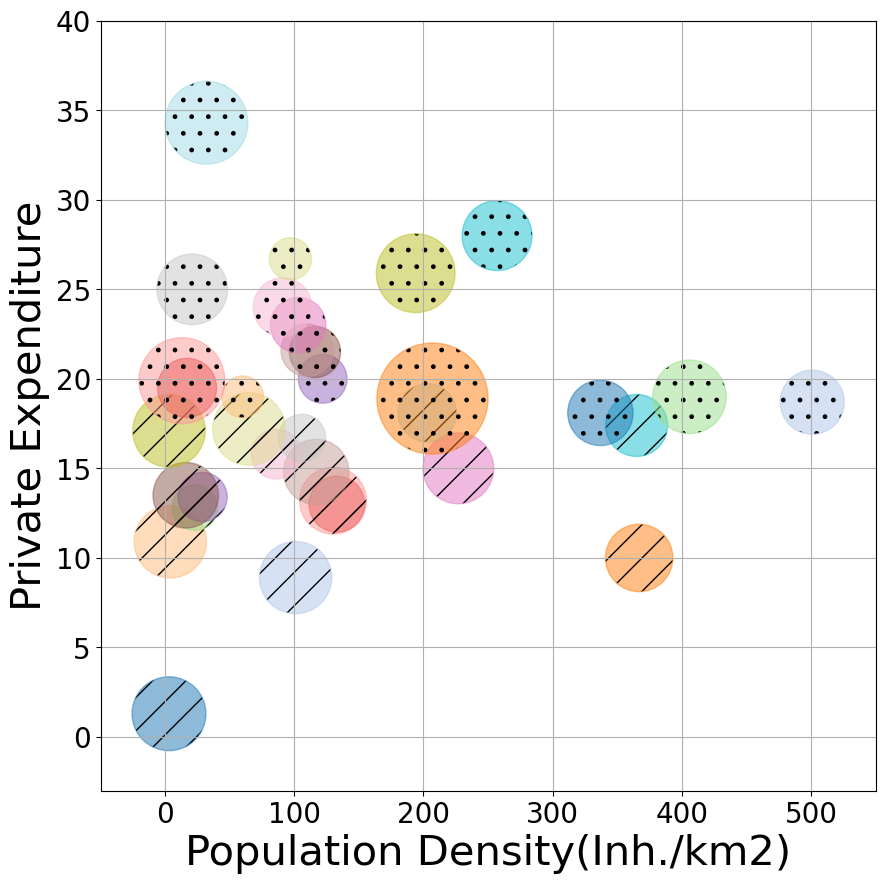

In [6]:
cmap = cm.get_cmap('tab20', lut=int(len(countries)/2))
c_arr = [cmap(i) for i in range(int(len(countries)/2))]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(population_denstiy[:17],
            private_expenditure[:17],
            s=gdp_size[:17]**2,
            c=c_arr,
            alpha=0.5,
            hatch='/')

ax.scatter(population_denstiy[17:],
            private_expenditure[17:],
            s=gdp_size[17:]**2,
            c=c_arr,
            alpha=0.5,
            hatch='.')

ax.set_xlim([-50, 550])
ax.set_ylim([-3, 40])

ax.set_xlabel("Population Density(Inh./km2)",fontsize=30)
ax.set_ylabel("Private Expenditure",fontsize=30)

ax.tick_params(labelsize=20)
ax.grid()

In [7]:
for country_idx in range(17):
    ax.scatter([], [],
                color=c_arr[country_idx],
                hatch='/',
                s=500,
                label=countries[country_idx])
for country_idx in range(17, 17+17):
    ax.scatter([], [],
                color=c_arr[country_idx-17],
                hatch='.',
                s=500,
                label=countries[country_idx])
    ax.legend(loc='upper left',
                bbox_to_anchor=(1, 1),
                ncol=2,
                labelspacing=2)

legend_gdp = [i for i in range(10, 61, 15)]
legend_sizes = data2size(legend_gdp, 30, 80)

ax2 = ax.twinx()
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

for legend_idx, legend_size in enumerate(legend_sizes):
    ax2.scatter([], [],
                color='tab:blue',
                s=legend_size**2,
                label=legend_gdp[legend_idx])
ax2.legend(loc='lower center',
            bbox_to_anchor=(0.5, 1.05),
            title='GDP Value',
            title_fontsize=30,
            ncol=4,
            labelspacing=2,
            edgecolor='None',
            handletextpad=2,
            fontsize=20)